In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
l_decent = np.loadtxt("fcn_loss_decentralized.txt")
lt_decent = np.loadtxt("fcn_test_loss_decentralized.txt")
t_decent = np.loadtxt("T_decentralized.txt")

l_dist = np.loadtxt("fcn_loss_distributed.txt")
lt_dist = np.loadtxt("fcn_test_loss_distributed.txt")
t_dist = np.loadtxt("T_distributed.txt")

l_dist_Q1 = np.loadtxt("fcn_loss_distributed_Q1.txt")
lt_dist_Q1 = np.loadtxt("fcn_test_loss_distributed_Q1.txt")
t_dist_Q1 = np.loadtxt("T_distributed.txt_Q1")

l_admm = np.loadtxt("fcn_loss_admm_1.0.txt")
lt_admm = np.loadtxt("fcn_test_loss_admm_1.0.txt")
t_admm = np.loadtxt("T_admm_5000.0.txt")

OSError: T_distributed.txt_Q1 not found.

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(np.cumsum(t_dist), label="Distributed")
ax.plot(np.cumsum(t_decent), label="Decentralized")
ax.plot(np.cumsum(t_admm), label="ADMM")
plt.legend()

In [111]:
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
fsize = (16, 9)
fig, ax = plt.subplots(1,1, figsize=fsize)

# Distributed
for quantization_method in [None, "Q1", "Q2"]:
    
    l_dist = np.loadtxt("fcn_loss_distributed_{}.txt".format(quantization_method))
    lt_dist = np.loadtxt("fcn_test_loss_distributed_{}.txt".format(quantization_method))
    t_dist = np.loadtxt("T_distributed_{}.txt".format(quantization_method))
    
    base_line, = ax.plot(np.cumsum(t_dist, axis=0)[1:],l_dist[1:], 
            label="Distributed - Train, Q-method: {}".format(quantization_method))
    ax.plot(np.cumsum(t_dist, axis=0)[1:],lt_dist[1:], 
            label="Distributed - Test, Q-method: {}".format(quantization_method), linestyle="--", color=base_line.get_color())
    
ax.set_xlabel("Total communication cost, T")
ax.set_ylabel("Loss")

# ax.set_yscale('log')
sns.despine(ax=ax)
plt.legend(loc='lower right')
plt.savefig("learning_curve.png")

# Decentralized

# fig, ax = plt.subplots(1,1, figsize=fsize)
for quantization_method in [None, "Q1", "Q2"]:
    
    l_decent = np.loadtxt("fcn_loss_decentralized_{}.txt".format(quantization_method))
    lt_decent = np.loadtxt("fcn_test_loss_decentralized_{}.txt".format(quantization_method))
    t_decent = np.loadtxt("T_decentralized_{}.txt".format(quantization_method))

    base_line, = ax.plot(np.cumsum(t_decent, axis=0)[1:],l_decent[1:,0], label="Decentralized - Train, Q-method: {}".format(quantization_method))
    ax.plot(np.cumsum(t_decent, axis=0)[1:],lt_decent[1:,0], label="Decentalized - Test, Q-method: {}".format(quantization_method), linestyle="--", color=base_line.get_color())

ax.set_xlabel("Total communication cost, T")
ax.set_ylabel("Loss")

# ax.set_yscale('log')
sns.despine(ax=ax)
plt.legend(loc='lower right')
plt.savefig("learning_curve.png")

#fig, ax = plt.subplots(1,1, figsize=fsize)

# ADMM
for quantization_method in [None, "Q1", "Q2"]:
    for rho in [1.0, 5000.0]:
        for l in [1e-3, 1e-4, 1e-5]:

            try:
                l_admm = np.loadtxt("fcn_loss_admm_test_{}_{}_{}.txt".format(rho, l, quantization_method))
                lt_admm = np.loadtxt("fcn_test_loss_admm_test_{}_{}_{}.txt".format(rho, l, quantization_method))
                t_admm = np.loadtxt("T_admm_test_{}_{}_{}.txt".format(rho, l, quantization_method))
                
                base_line,  = ax.plot(np.cumsum(t_admm, axis=0)[1:],l_admm[1:], label=r"ADMM - Train, rho = {}, lambda = {}, Q-method: {}".format(rho, l, quantization_method), linestyle="-")
                ax.plot(np.cumsum(t_admm, axis=0)[1:],lt_admm[1:], label=r"ADMM - Test, rho = {}, lambda = {}, Q-method: {}".format(rho, l, quantization_method), linestyle="--", color=base_line.get_color())
            except:
                pass
    
ax.set_xlabel("Total communication cost, T")
ax.set_ylabel("Loss")

ax.set_yscale('log')
sns.despine(ax=ax)
plt.legend(loc='lower right')
plt.savefig("learning_curve.png")

In [6]:
A = np.zeros((3,3))

In [7]:
A[0,0] = A[1,1] = A[2,2] = 1

In [8]:
A[2,0] = A[0,2] = 1

In [9]:
A[2,1] = A[1,2] = 1

In [10]:
A

array([[1., 0., 1.],
       [0., 1., 1.],
       [1., 1., 1.]])

In [11]:
A = A / np.sum(A, axis=0)

In [12]:
B = np.array([[4,2,4],[4,1,0],[0,2,3],[1,2,3]])

In [13]:
B

array([[4, 2, 4],
       [4, 1, 0],
       [0, 2, 3],
       [1, 2, 3]])

In [14]:
np.dot(B, A)

array([[4.        , 3.        , 3.33333333],
       [2.        , 0.5       , 1.66666667],
       [1.5       , 2.5       , 1.66666667],
       [2.        , 2.5       , 2.        ]])

In [15]:
B@A == np.dot(B, A)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [16]:
A.sum()

3.0

In [17]:
np.ceil(A).sum()

7.0

In [18]:
A

array([[0.5       , 0.        , 0.33333333],
       [0.        , 0.5       , 0.33333333],
       [0.5       , 0.5       , 0.33333333]])

In [19]:
A = np.zeros((10, 10))

# Everyone is connected to themselves
for m in range(10):
    A[m, m] = 1

# Nodes 0-3 are connected to node 4
for m in [0, 1, 2, 3]:
    A[m, 4] = A[4, m] = 1

# Nodes 6-9 are connected to node 5
for m in [6, 7, 8, 9]:
    A[m, 5] = A[5, m] = 1

# Nodes 4 and 5 are connected to each other
A[4, 5] = A[5, 4] = 1

# Divide a column of the matrix with the sum of the column.
A = A / np.sum(A, axis=0)

In [20]:
A

array([[0.5       , 0.        , 0.        , 0.        , 0.16666667,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.        , 0.        , 0.16666667,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.5       , 0.        , 0.16666667,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5       , 0.16666667,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.16666667,
        0.16666667, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.16666667,
        0.16666667, 0.5       , 0.5       , 0.5       , 0.5       ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.16666667, 0.5       , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [21]:
np.fill_diagonal(np.ceil(A),0)

In [22]:
(np.ceil(A)-np.eye(A.shape[0])).sum()

18.0

In [23]:
help(np.eye)

Help on function eye in module numpy:

eye(N, M=None, k=0, dtype=<class 'float'>, order='C')
    Return a 2-D array with ones on the diagonal and zeros elsewhere.
    
    Parameters
    ----------
    N : int
      Number of rows in the output.
    M : int, optional
      Number of columns in the output. If None, defaults to `N`.
    k : int, optional
      Index of the diagonal: 0 (the default) refers to the main diagonal,
      a positive value refers to an upper diagonal, and a negative value
      to a lower diagonal.
    dtype : data-type, optional
      Data-type of the returned array.
    order : {'C', 'F'}, optional
        Whether the output should be stored in row-major (C-style) or
        column-major (Fortran-style) order in memory.
    
        .. versionadded:: 1.14.0
    
    Returns
    -------
    I : ndarray of shape (N,M)
      An array where all elements are equal to zero, except for the `k`-th
      diagonal, whose values are equal to one.
    
    See Also
    -

In [24]:
x_dist = np.loadtxt("x_distributed.txt")
x_decent = np.loadtxt("x_decentralized_Q2.txt")
x_admm = np.loadtxt("x_admm.txt")

OSError: x_admm.txt not found.

In [ ]:
x_decent.shape

In [ ]:
for x in [x_decent, x_dist, x_admm]:
    print([min(x.flatten()), max(x.flatten())])


In [25]:
x1_admm = np.loadtxt("x_admm_5000.0_{}.txt".format(1e-4))
x2_admm = np.loadtxt("x_admm_5000.0_{}.txt".format(1e-3))
plt.plot(x1_admm, x2_admm,'x')

OSError: x_admm_5000.0_0.0001.txt not found.

In [26]:
labels = ["Decentralized", "Distributed", "ADMM"]

for l in [1e-5, 1e-4, 1e-3]:
    x_admm = np.loadtxt("x_admm_5000.0_{}.txt".format(l))


    fig, ax = plt.subplots(1,3, figsize=(16,4))
    for a, x in zip(ax, [x_decent, x_dist, x_admm]):
        a.plot(x)

    for i, a in enumerate(ax):
        a.set_title(labels[i])
        a.set_xlabel("Weight index")
        a.set_ylabel("Weight value")
        sns.despine(ax=a)

    plt.savefig("weights_1d_{}.png".format(l))

OSError: x_admm_5000.0_1e-05.txt not found.

In [27]:
labels = ["Decentralized", "Distributed", "ADMM"]

for l in [1e-5, 1e-4, 1e-3]:
    x_admm = np.loadtxt("x_admm_5000.0_{}.txt".format(l))


    fig, ax = plt.subplots(1,3, figsize=(16,4))
    for a, x in zip(ax, [x_decent, x_dist, x_admm]):
        if x.ndim > 1:
            x = x[:,1]
        sns.distplot(x, ax=a);

    for i, a in enumerate(ax):
        a.set_title(labels[i])
        a.set_xlabel("Weight index")
        a.set_ylabel("Weight value")
        sns.despine(ax=a)

    plt.savefig("weights_1d_{}.png".format(l))

OSError: x_admm_5000.0_1e-05.txt not found.

In [28]:
labels = ["Decentralized", "Distributed", "ADMM l=0","ADMM l=1e-3"]

fig, ax = plt.subplots(1,4, figsize=(16,4))
for a, x in zip(ax, [x_decent, x_dist, x1_admm, x2_admm]):
    print(x.shape)
    if x.ndim > 1:
        img1 = a.imshow(x[:,1].reshape((28,28)))
    else:
        img1 = a.imshow(x.reshape((28,28)))
    
    fig.colorbar(img1, ax=a)

for i, a in enumerate(ax):
    a.set_title(labels[i])
    a.set_xlabel("Weight index")
    a.set_ylabel("Weight index")
    sns.despine(ax=a)
    
plt.savefig("weights_as_img.png")

NameError: name 'x1_admm' is not defined

In [ ]:
a = np.random.randint(100, size=10)
b = np.random.randint(100, size=10)

In [ ]:
idx_a = np.random.randint(a.shape[0], size=5)
idx_b = np.random.randint(a.shape[0], size=5)

In [ ]:
a[idx_a] = 0
b[idx_b] = 0

In [ ]:
np.horcat(a,b)

In [ ]:
np.stack((a,b)).sum(axis=0)

In [29]:
np.stack((a,b)).sum(axis=0)/(np.stack((a,b))>0).sum(axis=0)

NameError: name 'a' is not defined

In [30]:
import math
math.ceil(34343*0.9)

30909

In [31]:
a.ndim

NameError: name 'a' is not defined

In [32]:
519//2

259

In [33]:
 math.ceil(519*0.5)

260

In [34]:
x = np.random.rand(10)
bins = np.linspace(0,1,10)

In [35]:
bins

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [36]:
xprime = bins[np.digitize(x, bins, right=False)]

In [37]:
x

array([0.44289413, 0.24393766, 0.21339631, 0.28142209, 0.19080745,
       0.85694511, 0.72423152, 0.36350981, 0.82869462, 0.05237255])

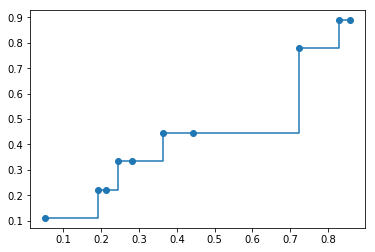

In [38]:
plt.step(np.sort(x),np.sort(xprime),'o', where='post')

In [39]:
np.sort(x)

array([0.05237255, 0.19080745, 0.21339631, 0.24393766, 0.28142209,
       0.36350981, 0.44289413, 0.72423152, 0.82869462, 0.85694511])

In [40]:
np.clip(x, 0, .5)

array([0.44289413, 0.24393766, 0.21339631, 0.28142209, 0.19080745,
       0.5       , 0.5       , 0.36350981, 0.5       , 0.05237255])

In [91]:
def quantize(xinput, method=None, K=None, bits=16):
    """
    Quantize vector
    """
    
    x = xinput.copy()

    # Q1 method sparsifies vector
    if method == "Q1":

        # Randomly keep K rows
        if K is None:
            K = math.ceil(x.shape[0] * 0.5)

        row_index = np.random.randint(x.shape[0], size=(x.shape[0] - K))

        if x.ndim == 2:
            for column in range(x.shape[1]):
                x[row_index, column] = 0
        else:
            x[row_index] = 0

        return x, K

    # Q2 method represents each element with less bits
    elif method == "Q2":

        bins = np.linspace(-1, 1, 2**bits)
        xprime = bins[np.digitize(np.clip(x, -1, 1), bins, right=True)]

        # Return quantized vector in bytes
        return xprime, x.shape[0] * bits / 32.0

    else:

        # None of the above
        return x, x.shape[0]

In [92]:
x = np.array([-2, -1, 0, 1, 2])
bins = np.linspace(0,1,10)
xprime = bins[np.digitize(np.clip(x, -1, 1), bins, right=True)]

In [105]:
x = np.random.rand(20)
xq,_ = quantize(x, "Q1")

In [106]:
xq

array([0.566741  , 0.        , 0.16108327, 0.        , 0.67871004,
       0.70047942, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.78146269, 0.83264406, 0.        , 0.17636769,
       0.84568072, 0.        , 0.6369381 , 0.14465972, 0.        ])

In [107]:
x

array([0.566741  , 0.74650212, 0.16108327, 0.68802964, 0.67871004,
       0.70047942, 0.37535206, 0.47616602, 0.06480462, 0.69022787,
       0.08233513, 0.78146269, 0.83264406, 0.38315094, 0.17636769,
       0.84568072, 0.96847081, 0.6369381 , 0.14465972, 0.76370292])

In [109]:
np.sum(xq!=0)

10